In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
size_plot = 24 * 1.5

from utils import *

In [2]:
density_values, intgral_list, system_matrix_size = get_density_list()
system_matrix_size_home = system_matrix_size[0:2]
home_pc_median, home_pc_min, home_pc_max, home_pc_std = load_cpu_stats_from_files_pînned("other/transfer_with_pinned_single_home_pc", system_matrix_size_home)
server_median, server_min, server_max, server_std = load_cpu_stats_from_files_pînned("other/transfer_with_pinned_single_server", system_matrix_size)

system_matrix_size_home_GiB = system_matrix_size_home/ 1e9  * 16
system_matrix_size_GiB = system_matrix_size / 1e9  * 16

C:\Users\Ian\AppData\Local\Temp\ipykernel_35788\3403084684.py:40: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


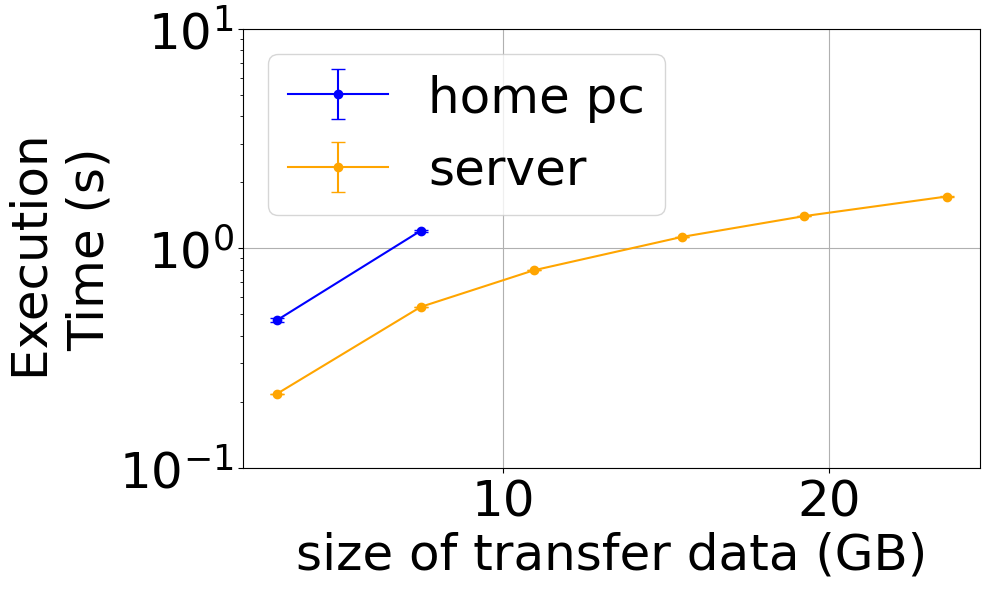

In [3]:
# Compute bandwidth and error
home_pc_bandwidth = np.array(system_matrix_size_home_GiB) / np.array(home_pc_median)
home_pc_bandwidth_err = np.array(system_matrix_size_home_GiB) * np.array(home_pc_std) / (np.array(home_pc_median) ** 2)

server_bandwidth = np.array(system_matrix_size_GiB) / np.array(server_median)
server_bandwidth_err = np.array(system_matrix_size_GiB) * np.array(server_std) / (np.array(server_median) ** 2)


# Plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.errorbar(
    system_matrix_size_home_GiB, home_pc_median, yerr=home_pc_std,
    marker='o', label='home pc', color='blue', capsize=5, linestyle='-'
)

ax.errorbar(
    system_matrix_size_GiB, server_median, yerr=server_std,
    marker='o', label='server', color='orange', capsize=5, linestyle='-'
)



ax.set_xlabel('size of transfer data (GB)', fontsize=size_plot)
ax.set_ylabel('Execution \nTime (s)', fontsize=size_plot)

ax.tick_params(axis='both', labelsize=size_plot)
ax.set_yscale('log') 
ax.set_ylim(1e-1, 1e1)

fig.canvas.draw()
# ax.xaxis.offsetText.set_fontsize(size_plot)
# ax.yaxis.offsetText.set_fontsize(size_plot)

offset_text = ax.xaxis.get_offset_text()
offset_text.set_size(size_plot)

ax.legend(fontsize=size_plot)

plt.ylim(bottom=0)
ax.grid(True)
plt.tight_layout()
plt.savefig("graphs/time_to_transfer_data_with_pinned_single.svg", format='svg')
plt.show()


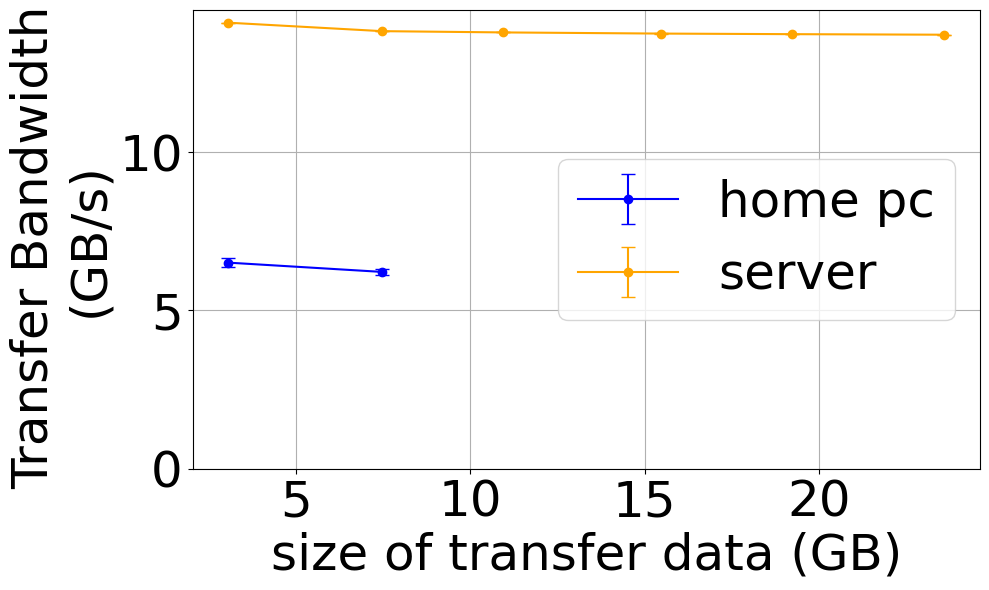

In [7]:
# Compute bandwidth and error
home_pc_bandwidth = np.array(system_matrix_size_home_GiB) / np.array(home_pc_median)
home_pc_bandwidth_err = np.array(system_matrix_size_home_GiB) * np.array(home_pc_std) / (np.array(home_pc_median) ** 2)

server_bandwidth = np.array(system_matrix_size_GiB) / np.array(server_median)
server_bandwidth_err = np.array(system_matrix_size_GiB) * np.array(server_std) / (np.array(server_median) ** 2)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.errorbar(
    system_matrix_size_home_GiB, home_pc_bandwidth, yerr=home_pc_bandwidth_err,
    marker='o', label='home pc', color='blue', capsize=5, linestyle='-'
)

ax.errorbar(
    system_matrix_size_GiB, server_bandwidth, yerr=server_bandwidth_err,
    marker='o', label='server', color='orange', capsize=5, linestyle='-'
)

ax.set_xlabel('size of transfer data (GB)', fontsize=size_plot)
ax.set_ylabel('Transfer Bandwidth \n(GB/s)', fontsize=size_plot)

ax.tick_params(axis='both', labelsize=size_plot)
ax.set_yscale('linear')  # Likely more appropriate for bandwidth

fig.canvas.draw()
# ax.xaxis.offsetText.set_fontsize(size_plot)
# ax.yaxis.offsetText.set_fontsize(size_plot)

offset_text = ax.xaxis.get_offset_text()
offset_text.set_size(size_plot)

ax.legend(fontsize=size_plot, loc='center right')

plt.ylim(bottom=0)
ax.grid(True)
plt.tight_layout()
plt.savefig("graphs/transfer_bandwidth_with_pinned_single.svg", format='svg')
plt.show()
